# 01_basics.py 

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

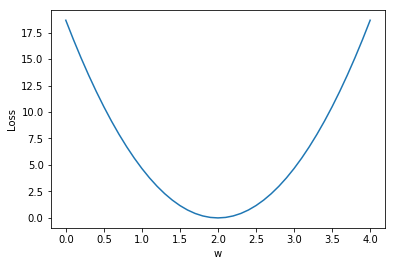

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


# our model for the forward pass
def forward(x):
    return x * w


# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
    print("MSE=", l_sum / 3)
    w_list.append(w)
    mse_list.append(l_sum / 3)

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

# 03_Manual Gradient

In [10]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0  # a random guess: random value

# our model forward pass


def forward(x):
    return x * w


# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


# compute gradient
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x * w - y)

# Before training
print("predict (before training)",  4, forward(4))

# Training loop
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
       # print("weight", w)
        print("\tgrad: ", x_val, y_val, round(grad, 2))
        l = loss(x_val, y_val)

    print("progress:", epoch, "w=", round(w, 2), "loss=", round(l, 2))

# After training
print("predict (after training)",  "4 hours", forward(4))

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 4.92
	grad:  1.0 2.0 -1.48
	grad:  2.0 4.0 -5.8
	grad:  3.0 6.0 -12.0
progress: 1 w= 1.45 loss= 2.69
	grad:  1.0 2.0 -1.09
	grad:  2.0 4.0 -4.29
	grad:  3.0 6.0 -8.87
progress: 2 w= 1.6 loss= 1.47
	grad:  1.0 2.0 -0.81
	grad:  2.0 4.0 -3.17
	grad:  3.0 6.0 -6.56
progress: 3 w= 1.7 loss= 0.8
	grad:  1.0 2.0 -0.6
	grad:  2.0 4.0 -2.34
	grad:  3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 0.44
	grad:  1.0 2.0 -0.44
	grad:  2.0 4.0 -1.73
	grad:  3.0 6.0 -3.58
progress: 5 w= 1.84 loss= 0.24
	grad:  1.0 2.0 -0.33
	grad:  2.0 4.0 -1.28
	grad:  3.0 6.0 -2.65
progress: 6 w= 1.88 loss= 0.13
	grad:  1.0 2.0 -0.24
	grad:  2.0 4.0 -0.95
	grad:  3.0 6.0 -1.96
progress: 7 w= 1.91 loss= 0.07
	grad:  1.0 2.0 -0.18
	grad:  2.0 4.0 -0.7
	grad:  3.0 6.0 -1.45
progress: 8 w= 1.93 loss= 0.04
	grad:  1.0 2.0 -0.13
	grad:  2.0 4.0 -0.52
	grad:  3.0 6.0 -1.07
progress: 9 w= 1.95 loss= 0.02
pred

# 04_Auto-Gradient

In [15]:
import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value

# our model forward pass


def forward(x):
    return x * w

# Loss function


def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

# Before training
print("predict (before training)",  4, forward(4).data[0])

# Training loop
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        l.backward()
        print("\tgrad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data
        # Manually zero the gradients after updating weights
        w.grad.data.zero_()

    print("progress:", epoch, l.data[0])

# After training
print("predict (after training)",  4, forward(4).data[0])

predict (before training) 4 tensor(4.)
	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad:  1.0 2.0 tensor(-0.4417)
	grad:  2.0 4.0 tensor(-1.7316)
	grad:  3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad:  1.0 2.0 tensor(-0.3266)
	grad:  2.0 4.0 tensor(-1.2802)
	grad:  3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad:  1.0 2.0 tensor(-0.2414)
	grad:  2.0 4.0 tensor(-0.9465)
	grad:  3.0 6.0 tensor(-1.9592)
progre

# 05_Linear Regression

In [16]:
from torch.autograd import Variable

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))


class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred



In [19]:
# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
hour_var = Variable(torch.Tensor([[4.0]]))
y_pred = model(hour_var)
print("predict (after training)",  4, model(hour_var).data[0][0])

/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


0 tensor(36.9267)
1 tensor(16.5235)
2 tensor(7.4394)
3 tensor(3.3942)
4 tensor(1.5922)
5 tensor(0.7889)
6 tensor(0.4301)
7 tensor(0.2692)
8 tensor(0.1965)
9 tensor(0.1630)
10 tensor(0.1470)
11 tensor(0.1388)
12 tensor(0.1341)
13 tensor(0.1310)
14 tensor(0.1286)
15 tensor(0.1265)
16 tensor(0.1246)
17 tensor(0.1227)
18 tensor(0.1210)
19 tensor(0.1192)
20 tensor(0.1175)
21 tensor(0.1158)
22 tensor(0.1141)
23 tensor(0.1125)
24 tensor(0.1109)
25 tensor(0.1093)
26 tensor(0.1077)
27 tensor(0.1062)
28 tensor(0.1046)
29 tensor(0.1031)
30 tensor(0.1017)
31 tensor(0.1002)
32 tensor(0.0988)
33 tensor(0.0973)
34 tensor(0.0959)
35 tensor(0.0946)
36 tensor(0.0932)
37 tensor(0.0919)
38 tensor(0.0905)
39 tensor(0.0892)
40 tensor(0.0880)
41 tensor(0.0867)
42 tensor(0.0854)
43 tensor(0.0842)
44 tensor(0.0830)
45 tensor(0.0818)
46 tensor(0.0806)
47 tensor(0.0795)
48 tensor(0.0783)
49 tensor(0.0772)
50 tensor(0.0761)
51 tensor(0.0750)
52 tensor(0.0739)
53 tensor(0.0729)
54 tensor(0.0718)
55 tensor(0.0708)


# 06_Rogistic Regression

In [20]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0], [4.0]]))
y_data = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]))


class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.
        """
        y_pred = F.sigmoid(self.linear(x))
        return y_pred



In [21]:
# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
hour_var = Variable(torch.Tensor([[1.0]]))
print("predict 1 hour ", 1.0, model(hour_var).data[0][0] > 0.5)
hour_var = Variable(torch.Tensor([[7.0]]))
print("predict 7 hours", 7.0, model(hour_var).data[0][0] > 0.5)

/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


0 tensor(0.7836)
1 tensor(0.7830)
2 tensor(0.7824)
3 tensor(0.7818)
4 tensor(0.7812)
5 tensor(0.7807)
6 tensor(0.7801)
7 tensor(0.7795)
8 tensor(0.7790)
9 tensor(0.7784)
10 tensor(0.7779)
11 tensor(0.7774)
12 tensor(0.7769)
13 tensor(0.7763)
14 tensor(0.7758)
15 tensor(0.7753)
16 tensor(0.7748)
17 tensor(0.7743)
18 tensor(0.7739)
19 tensor(0.7734)
20 tensor(0.7729)
21 tensor(0.7724)
22 tensor(0.7720)
23 tensor(0.7715)
24 tensor(0.7711)
25 tensor(0.7706)
26 tensor(0.7702)
27 tensor(0.7697)
28 tensor(0.7693)
29 tensor(0.7688)
30 tensor(0.7684)
31 tensor(0.7680)
32 tensor(0.7676)
33 tensor(0.7671)
34 tensor(0.7667)
35 tensor(0.7663)
36 tensor(0.7659)
37 tensor(0.7655)
38 tensor(0.7651)
39 tensor(0.7647)
40 tensor(0.7643)
41 tensor(0.7639)
42 tensor(0.7635)
43 tensor(0.7631)
44 tensor(0.7627)
45 tensor(0.7623)
46 tensor(0.7619)
47 tensor(0.7615)
48 tensor(0.7611)
49 tensor(0.7607)
50 tensor(0.7603)
51 tensor(0.7600)
52 tensor(0.7596)
53 tensor(0.7592)
54 tensor(0.7588)
55 tensor(0.7584)
56

# 07_diabetes_RogisticRegression

In [87]:
import torch
from torch.autograd import Variable
import numpy as np

xy = np.loadtxt('./data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = Variable(torch.from_numpy(xy[:, 0:-1]))
y_data = Variable(torch.from_numpy(xy[:, [-1]]))

print(x_data.data.shape)
print(y_data.data.shape)


class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 1)

        #self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
       # out1 = self.sigmoid(self.l1(x))
        #out2 = self.sigmoid(self.l2(out1))
        #y_pred = self.sigmoid(self.l3(out2))
        
        out1 = self.relu(self.l1(x))
        out2 = self.relu(self.l2(out1))
        y_pred = self.relu(self.l3(out2))
        return y_pred



torch.Size([759, 8])
torch.Size([759, 1])


In [90]:
# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
Criterion = torch.nn.BCELoss(size_average=True)
#criterion = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(100):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)
    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

RuntimeError: Expected object of type torch.LongTensor but found type torch.FloatTensor for argument #2 'target'

# 08_1_dataset_loader

In [24]:
# References
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py
# http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader


class DiabetesDataset(Dataset):
    """ Diabetes dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        xy = np.loadtxt('./data/diabetes.csv.gz',
                        delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len




In [25]:
dataset = DiabetesDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2)

# for data view purpose
for epoch in range(2):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Run your training process
        print(epoch, i, "inputs", inputs.data, "labels", labels.data)

0 0 inputs tensor([[-0.7647, -0.1859, -0.0164, -0.5556,  0.0000, -0.1744, -0.8190, -0.8667],
        [-0.8824, -0.1156,  0.0164, -0.5152, -0.8960, -0.1088, -0.7062, -0.9333],
        [-0.5294, -0.0553,  0.0656, -0.5556,  0.0000, -0.2638, -0.9402,  0.0000],
        [-0.0588,  0.1256,  0.1803,  0.0000,  0.0000, -0.2966, -0.3493,  0.2333],
        [ 0.2941,  0.3869,  0.2459,  0.0000,  0.0000, -0.0104, -0.7079, -0.5333],
        [-0.7647,  0.4673,  0.0000,  0.0000,  0.0000, -0.1803, -0.8617, -0.7667],
        [-0.0588,  0.8693,  0.4754, -0.2929, -0.4681,  0.0283, -0.7054, -0.4667],
        [-0.6471,  0.2362,  0.6393, -0.2929, -0.4326,  0.7079, -0.3151, -0.9667],
        [-0.5294,  0.4271,  0.4098,  0.0000,  0.0000,  0.3115, -0.5158, -0.9667],
        [-0.6471,  0.5879,  0.1475, -0.3939, -0.2246,  0.0581, -0.7728, -0.5333],
        [-0.5294, -0.0251, -0.0164, -0.5354,  0.0000, -0.1595, -0.6883, -0.9667],
        [-0.5294,  0.0955,  0.0492, -0.1111, -0.7660,  0.0373, -0.2938, -0.8333],
     

In [ ]:
class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 1)

        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(2):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(inputs)

        # Compute and print loss
        loss = criterion(y_pred, labels)
        print(epoch, i, loss.data[0])

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# 09_Softmax Classifier

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable


# Cross entropy example using one_hot encoding
import numpy as np
# One hot
# 0: 1 0 0
# 1: 0 1 0
# 2: 0 0 1
Y = np.array([1, 0, 0])

Y_pred1 = np.array([0.7, 0.2, 0.1])
Y_pred2 = np.array([0.1, 0.3, 0.6])
#print("loss1 = ", np.sum(-Y * np.log(Y_pred1)))
#print("loss2 = ", np.sum(-Y * np.log(Y_pred2)))


Y is  tensor(0)
PyTorch Loss1 =  tensor(0.4170) 
PyTorch Loss2= tensor(1.8406)
Y_pred1= tensor([0])
Y_pred2= tensor([1])


In [43]:
# Softmax + CrossEntropy (logSoftmax + NLLLoss) not one hot encoding
loss = nn.CrossEntropyLoss()

# target is of size nBatch
# each element in target has to have 0 <= value < nClasses (0-2)
# Input is class, not one-hot
Y = Variable(torch.LongTensor([0]), requires_grad=False)
print(Y)
# input is of size nBatch x nClasses = 1 x 4
# Y_pred are logits (not softmax)
Y_pred1 = Variable(torch.Tensor([[2.0, 1.0, 0.1]]))
Y_pred2 = Variable(torch.Tensor([[0.5, 2.0, 0.3]]))

l1 = loss(Y_pred1, Y)
l2 = loss(Y_pred2, Y)

print("PyTorch Loss1 = ", l1.data, "\nPyTorch Loss2=", l2.data)

print("Y_pred1=", torch.max(Y_pred1.data, 1)[1])
print("Y_pred2=", torch.max(Y_pred2.data, 1)[1])



tensor([0])
PyTorch Loss1 =  tensor(0.4170) 
PyTorch Loss2= tensor(1.8406)
Y_pred1= tensor([0])
Y_pred2= tensor([1])


In [35]:
# target is of size nBatch
# each element in target has to have 0 <= value < nClasses (0-2)
# Input is class, not one-hot
#Y는 각 행의 정답 위치를 알려주는 것... 보통 cross Entropy공식으로 생각하면 곤란할 듯.. 이 클래스에 따라 자기가 one hot encoding을 따로 하는듯
Y = Variable(torch.LongTensor([2, 0, 1]), requires_grad=False)
print(Y)
# input is of size nBatch x nClasses = 2 x 4
# Y_pred are logits (not softmax)
Y_pred1 = Variable(torch.Tensor([[0.1, 0.2, 0.9],
                                 [1.1, 0.1, 0.2],
                                 [0.2, 2.1, 0.1]]))


Y_pred2 = Variable(torch.Tensor([[0.8, 0.2, 0.3],
                                 [0.2, 0.3, 0.5],
                                 [0.2, 0.2, 0.5]]))

l1 = loss(Y_pred1, Y)
l2 = loss(Y_pred2, Y)

print("Batch Loss1 = ", l1.data, "\nBatch Loss2=", l2.data)

tensor([2, 0, 1])
Batch Loss1 =  tensor(0.4966) 
Batch Loss2= tensor(1.2389)


# 09_2_SoftMax_MNIST

In [44]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(784, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the data (n, 1, 28, 28)-> (n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)



Processing...
Done!


In [45]:

model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += criterion(output, target).data[0]
        # get the index of the max
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()

/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307632
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.295062
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.303119
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.297354
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.302720
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.315066
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.307038
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.308602
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.299308
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.305755
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.303960
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.301395
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.304117
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.298534
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.308986
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.295814
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.304835
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.306115
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.298112
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.293057
Train Epoch: 1 [12800/60000 (

/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0184, Accuracy: 5743/10000 (57%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.179027
Train Epoch: 2 [640/60000 (1%)]	Loss: 1.209702
Train Epoch: 2 [1280/60000 (2%)]	Loss: 1.014983
Train Epoch: 2 [1920/60000 (3%)]	Loss: 1.238762
Train Epoch: 2 [2560/60000 (4%)]	Loss: 1.062274
Train Epoch: 2 [3200/60000 (5%)]	Loss: 1.214536
Train Epoch: 2 [3840/60000 (6%)]	Loss: 1.422569
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.931711
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.949558
Train Epoch: 2 [5760/60000 (10%)]	Loss: 1.062024
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.066345
Train Epoch: 2 [7040/60000 (12%)]	Loss: 1.036868
Train Epoch: 2 [7680/60000 (13%)]	Loss: 1.132463
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.859819
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.781555
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.978112
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.832537
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.920427
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.777410
Train Epoch: 2 [12

In [42]:
#just for torch.max test
Y_pred_scores = Variable(torch.Tensor([[0.3, 0.2, 0.9, 0.1]]))
print(Y_pred_scores)

#torch.max returns both the max values and indices
Y_pred_val, Y_pred_idx = torch.max(Y_pred_scores.data, 1)
print(Y_pred_val, Y_pred_idx)
y_pred_idx = torch.max(Y_pred_scores.data,1)[1]
print(y_pred_idx)

tensor([[0.3000, 0.2000, 0.9000, 0.1000]])
tensor([0.9000]) tensor([2])
tensor([2])


# 10_1_MNIST_CNN

In [47]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


Processing...
Done!


In [50]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)




In [51]:
model = Net()
print(model.conv2)

Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))


In [49]:
model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data[0]
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()

/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()
/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301609
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.292697
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.281476
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.285262
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.241161
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.244456
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.208648
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.182077
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.138679
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.054010
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.942920
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.776359
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.624144
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.345026
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.028052
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.998259
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.941431
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.829916
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.728360
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.695535
Train Epoch: 1 [12800/60000 (

/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.1808, Accuracy: 9466/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.105252
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.174871
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.119524
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.147263
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.194014
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.211439
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.125617
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.317368
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.270675
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.138950
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.171476
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.122384
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.100431
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.245362
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.288172
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.230558
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.220725
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.211584
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.297059
Train Epoch: 2 [12

In [54]:
 m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
print(input)
output = m(input)

tensor([[[ 1.1398,  0.0492, -1.2330,  ...,  0.1329,  1.5521,  0.6990],
         [-0.6062,  0.3039, -0.6295,  ..., -0.5077, -2.0444,  0.8801],
         [ 1.3606, -1.5083, -1.8740,  ...,  0.4258,  0.8267,  1.2640],
         ...,
         [-0.2470, -0.5960,  0.3125,  ..., -1.6148, -0.9761,  0.3852],
         [-0.0463,  0.8234, -0.1351,  ..., -1.2832,  0.5984, -0.1426],
         [-0.3475, -1.3489, -0.0714,  ...,  0.3206,  0.7208, -2.2372]],

        [[-0.0241,  0.2468, -0.7368,  ..., -0.1251, -1.0383, -1.5753],
         [-0.7845, -0.4677, -1.2237,  ..., -0.4035, -0.2353,  0.7655],
         [ 1.3126,  0.7105, -1.4776,  ...,  0.3350, -1.1821,  0.1837],
         ...,
         [-0.2918,  1.0135, -1.1932,  ...,  0.5947,  0.1615,  1.2094],
         [ 0.7874, -0.3772,  1.1154,  ..., -0.0033,  0.3556,  1.6145],
         [ 1.0081,  0.0604,  0.3051,  ..., -0.8557, -1.5964,  0.3333]],

        [[-0.5826, -2.0345,  0.1530,  ...,  0.3437,  1.0712,  0.1986],
         [ 0.3624,  0.4546, -1.0769,  ..., -0

# 11_1_AdvancedCNN

In [57]:
# https://github.com/pytorch/examples/blob/master/mnist/main.py
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class InceptionA(nn.Module):

    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)

        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(88, 20, kernel_size=5)

        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)

        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(1408, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)



In [58]:

model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data[0]
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()

/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:87: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309103
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.303921
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.298157
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.295048
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.298723
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.290981
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.295114
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.288141
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.307955
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.284344
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.274259
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.296044
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.266799
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.280445
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.274244
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.248479
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.240969
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.200672
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.158587
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.103314
Train Epoch: 1 [12800/60000 (

/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.1791, Accuracy: 9442/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.107685
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.146887
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.201372
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.236876
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.315779
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.154457
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.114969
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.232398
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.390035
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.104995
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.305182
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.110809
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.285429
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.301156
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.191527
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.093419
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.315737
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.133464
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.093832
Train Epoch: 2 [12

# 12_1_RNNBasic

In [61]:
import torch
import torch.nn as nn
from torch.autograd import Variable

# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# One cell RNN input_dim (4) -> output_dim (2). sequence: 5
cell = nn.RNN(input_size=4, hidden_size=2, batch_first=True)

# (num_layers * num_directions, batch, hidden_size) whether batch_first=True or False
hidden = Variable(torch.randn(1, 1, 2))

# Propagate input through RNN
# Input: (batch, seq_len, input_size) when batch_first=True
inputs = Variable(torch.Tensor([h, e, l, l, o]))
#print(inputs)
for one in inputs:
    one = one.view(1, 1, -1)
    print(one)
    # Input: (batch, seq_len, input_size) when batch_first=True
    out, hidden = cell(one, hidden)
    print("one input size", one.size(), "out size", out.size())



tensor([[[1., 0., 0., 0.]]])
one input size torch.Size([1, 1, 4]) out size torch.Size([1, 1, 2])
tensor([[[0., 1., 0., 0.]]])
one input size torch.Size([1, 1, 4]) out size torch.Size([1, 1, 2])
tensor([[[0., 0., 1., 0.]]])
one input size torch.Size([1, 1, 4]) out size torch.Size([1, 1, 2])
tensor([[[0., 0., 1., 0.]]])
one input size torch.Size([1, 1, 4]) out size torch.Size([1, 1, 2])
tensor([[[0., 0., 0., 1.]]])
one input size torch.Size([1, 1, 4]) out size torch.Size([1, 1, 2])


In [62]:
# We can do the whole at once
# Propagate input through RNN
# Input: (batch, seq_len, input_size) when batch_first=True
inputs = inputs.view(1, 5, -1)
#print(inputs)
out, hidden = cell(inputs, hidden)
print("sequence input size", inputs.size(), "out size", out.size())


tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]])
sequence input size torch.Size([1, 5, 4]) out size torch.Size([1, 5, 2])


In [63]:

# hidden : (num_layers * num_directions, batch, hidden_size) whether batch_first=True or False
hidden = Variable(torch.randn(1, 3, 2))

# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
# rank = (3, 5, 4)
inputs = Variable(torch.Tensor([[h, e, l, l, o],
                                [e, o, l, l, l],
                                [l, l, e, e, l]]))

# Propagate input through RNN
# Input: (batch, seq_len, input_size) when batch_first=True
# B x S x I
out, hidden = cell(inputs, hidden)
print("batch input size", inputs.size(), "out size", out.size())


# One cell RNN input_dim (4) -> output_dim (2)
cell = nn.RNN(input_size=4, hidden_size=2)

# The given dimensions dim0 and dim1 are swapped.
inputs = inputs.transpose(dim0=0, dim1=1)
# Propagate input through RNN
# Input: (seq_len, batch_size, input_size) when batch_first=False (default)
# S x B x I
out, hidden = cell(inputs, hidden)
print("batch input size", inputs.size(), "out size", out.size())

batch input size torch.Size([3, 5, 4]) out size torch.Size([3, 5, 2])
batch input size torch.Size([5, 3, 4]) out size torch.Size([5, 3, 2])


# 12_2_HelloRNN

In [67]:
# Lab 12 RNN
import sys
import torch
import torch.nn as nn
from torch.autograd import Variable

torch.manual_seed(777)  # reproducibility
#            0    1    2    3    4
idx2char = ['h', 'i', 'e', 'l', 'o']

# Teach hihell -> ihello
x_data = [0, 1, 0, 2, 3, 3]   # hihell
one_hot_lookup = [[1, 0, 0, 0, 0],  # 0
                  [0, 1, 0, 0, 0],  # 1
                  [0, 0, 1, 0, 0],  # 2
                  [0, 0, 0, 1, 0],  # 3
                  [0, 0, 0, 0, 1]]  # 4

y_data = [1, 0, 2, 3, 3, 4]    # ihello
x_one_hot = [one_hot_lookup[x] for x in x_data]


In [68]:
 #As we have one batch of samples, we will change them to variables only once
inputs = Variable(torch.Tensor(x_one_hot))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size = 5  # one-hot size
hidden_size = 5  # output from the RNN. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 1  # One by one
num_layers = 1  # one-layer rnn


class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.rnn = nn.RNN(input_size=input_size,
                          hidden_size=hidden_size, batch_first=True)

    def forward(self, hidden, x):
        # Reshape input (batch first)
        x = x.view(batch_size, sequence_length, input_size)

        # Propagate input through RNN
        # Input: (batch, seq_len, input_size)
        # hidden: (num_layers * num_directions, batch, hidden_size)
        out, hidden = self.rnn(x, hidden)
        return hidden, out.view(-1, num_classes)

    def init_hidden(self):
        # Initialize hidden and cell states
        # (num_layers * num_directions, batch, hidden_size)
        return Variable(torch.zeros(num_layers, batch_size, hidden_size))



In [69]:

# Instantiate RNN model
model = Model()
print(model)

# Set loss and optimizer function
# CrossEntropyLoss = LogSoftmax + NLLLoss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    optimizer.zero_grad()
    loss = 0
    hidden = model.init_hidden()

    sys.stdout.write("predicted string: ")
    for input, label in zip(inputs, labels):
        # print(input.size(), label.size())
        hidden, output = model(hidden, input)
        val, idx = output.max(1)
        sys.stdout.write(idx2char[idx.data[0]])
        loss += criterion(output, label)

    print(", epoch: %d, loss: %1.3f" % (epoch + 1, loss.data[0]))

    loss.backward()
    optimizer.step()

print("Learning finished!")

Model(
  (rnn): RNN(5, 5, batch_first=True)
)
predicted string: l

RuntimeError: dimension specified as 0 but tensor has no dimensions

# 12_3_HelloRNN_Sequence

In [94]:
# Lab 12 RNN
import torch
import torch.nn as nn
from torch.autograd import Variable

torch.manual_seed(777)  # reproducibility


idx2char = ['h', 'i', 'e', 'l', 'o']

# Teach hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

y_data = [1, 0, 2, 3, 3, 4]    # ihello

# As we have one batch of samples, we will change them to variables only once
inputs = Variable(torch.Tensor(x_one_hot))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
num_layers = 1  # one-layer rnn

print(inputs)
print(inputs.shape)


tensor([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 1., 0.]]])
torch.Size([1, 6, 5])


In [73]:
class RNN(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length

        self.rnn = nn.RNN(input_size=5, hidden_size=5, batch_first=True)

    def forward(self, x):
        # Initialize hidden and cell states
        # (num_layers * num_directions, batch, hidden_size) for batch_first=True
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        # Reshape input
        x.view(x.size(0), self.sequence_length, self.input_size)

        # Propagate input through RNN
        # Input: (batch, seq_len, input_size)
        # h_0: (num_layers * num_directions, batch, hidden_size)

        out, _ = self.rnn(x, h_0)
        return out.view(-1, num_classes)





In [74]:
# Instantiate RNN model
rnn = RNN(num_classes, input_size, hidden_size, num_layers)
print(rnn)

# Set loss and optimizer function
# CrossEntropyLoss = LogSoftmax + NLLLoss
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    outputs = rnn(inputs)
    optimizer.zero_grad()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(1)
    idx = idx.data.numpy()
    result_str = [idx2char[c] for c in idx.squeeze()]
    print("epoch: %d, loss: %1.3f" % (epoch + 1, loss.data[0]))
    print("Predicted string: ", ''.join(result_str))

print("Learning finished!")

RNN(
  (rnn): RNN(5, 5, batch_first=True)
)
epoch: 1, loss: 1.693
Predicted string:  llllll
epoch: 2, loss: 1.523
Predicted string:  llllll
epoch: 3, loss: 1.393
Predicted string:  llllll
epoch: 4, loss: 1.263
Predicted string:  llllll
epoch: 5, loss: 1.146
Predicted string:  llllll
epoch: 6, loss: 1.055
Predicted string:  lhelll
epoch: 7, loss: 1.002
Predicted string:  ihelll
epoch: 8, loss: 0.965
Predicted string:  ihelll
epoch: 9, loss: 0.913
Predicted string:  ihelll
epoch: 10, loss: 0.879
Predicted string:  ihelll
epoch: 11, loss: 0.840
Predicted string:  ihelll
epoch: 12, loss: 0.805
Predicted string:  ihello
epoch: 13, loss: 0.779
Predicted string:  ihello
epoch: 14, loss: 0.758
Predicted string:  ihello
epoch: 15, loss: 0.738
Predicted string:  ihello
epoch: 16, loss: 0.717
Predicted string:  ihello
epoch: 17, loss: 0.694
Predicted string:  ihello
epoch: 18, loss: 0.667
Predicted string:  ihelll
epoch: 19, loss: 0.643
Predicted string:  ihelll
epoch: 20, loss: 0.647
Predicted s

/home/hpshin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 76, loss: 0.462
Predicted string:  ihello
epoch: 77, loss: 0.462
Predicted string:  ihello
epoch: 78, loss: 0.462
Predicted string:  ihello
epoch: 79, loss: 0.461
Predicted string:  ihello
epoch: 80, loss: 0.461
Predicted string:  ihello
epoch: 81, loss: 0.461
Predicted string:  ihello
epoch: 82, loss: 0.461
Predicted string:  ihello
epoch: 83, loss: 0.460
Predicted string:  ihello
epoch: 84, loss: 0.460
Predicted string:  ihello
epoch: 85, loss: 0.460
Predicted string:  ihello
epoch: 86, loss: 0.460
Predicted string:  ihello
epoch: 87, loss: 0.460
Predicted string:  ihello
epoch: 88, loss: 0.460
Predicted string:  ihello
epoch: 89, loss: 0.459
Predicted string:  ihello
epoch: 90, loss: 0.459
Predicted string:  ihello
epoch: 91, loss: 0.459
Predicted string:  ihello
epoch: 92, loss: 0.459
Predicted string:  ihello
epoch: 93, loss: 0.459
Predicted string:  ihello
epoch: 94, loss: 0.459
Predicted string:  ihello
epoch: 95, loss: 0.459
Predicted string:  ihello
epoch: 96, loss: 0.4

# 12_4_HelloRNNEmbedding

In [75]:

# Lab 12 RNN
import torch
import torch.nn as nn
from torch.autograd import Variable

torch.manual_seed(777)  # reproducibility


idx2char = ['h', 'i', 'e', 'l', 'o']

# Teach hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
y_data = [1, 0, 2, 3, 3, 4]    # ihello

# As we have one batch of samples, we will change them to variables only once
inputs = Variable(torch.LongTensor(x_data))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size = 5
embedding_size = 10  # embedding size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
num_layers = 1  # one-layer rnn


In [76]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.RNN(input_size=embedding_size,
                          hidden_size=5, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Initialize hidden and cell states
        # (num_layers * num_directions, batch, hidden_size)
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        emb = self.embedding(x)
        emb = emb.view(batch_size, sequence_length, -1)

        # Propagate embedding through RNN
        # Input: (batch, seq_len, embedding_size)
        # h_0: (num_layers * num_directions, batch, hidden_size)
        out, _ = self.rnn(emb, h_0)
        return self.fc(out.view(-1, num_classes))




In [77]:
# Instantiate RNN model
model = Model()
print(model)

# Set loss and optimizer function
# CrossEntropyLoss = LogSoftmax + NLLLoss
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    outputs = model(inputs)
    optimizer.zero_grad()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(1)
    idx = idx.data.numpy()
    result_str = [idx2char[c] for c in idx.squeeze()]
    print("epoch: %d, loss: %1.3f" % (epoch + 1, loss.data[0]))
    print("Predicted string: ", ''.join(result_str))

print("Learning finished!")

Model(
  (embedding): Embedding(5, 10)
  (rnn): RNN(10, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=5, bias=True)
)


AttributeError: 'Model' object has no attribute 'num_layers'